#### 1. Reading and exploring data

  checking_balance  months_loan_duration credit_history               purpose  \
0           < 0 DM                     6       critical  furniture/appliances   
1       1 - 200 DM                    48           good  furniture/appliances   
2          unknown                    12       critical             education   
3           < 0 DM                    42           good  furniture/appliances   
4           < 0 DM                    24           poor                   car   

   amount savings_balance employment_duration  percent_of_income  \
0    1169         unknown           > 7 years                  4   
1    5951        < 100 DM         1 - 4 years                  2   
2    2096        < 100 DM         4 - 7 years                  2   
3    7882        < 100 DM         4 - 7 years                  2   
4    4870        < 100 DM         1 - 4 years                  3   

   years_at_residence  age other_credit housing  existing_loans_count  \
0                   4   67     

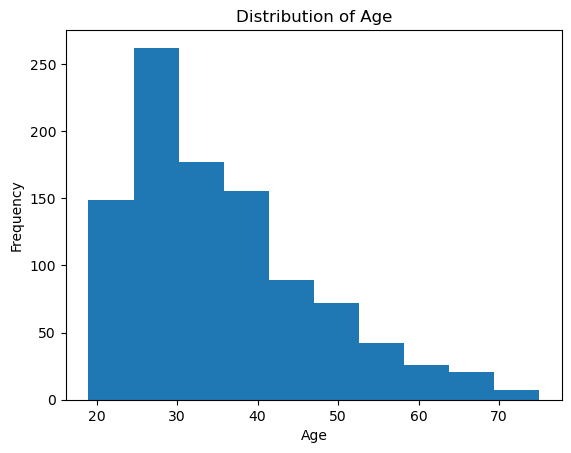

                      months_loan_duration    amount  percent_of_income  \
months_loan_duration              1.000000  0.624984           0.074749   
amount                            0.624984  1.000000          -0.271316   
percent_of_income                 0.074749 -0.271316           1.000000   
years_at_residence                0.034067  0.028926           0.049302   
age                              -0.036136  0.032716           0.058266   
existing_loans_count             -0.011284  0.020795           0.021669   
dependents                       -0.023834  0.017142          -0.071207   

                      years_at_residence       age  existing_loans_count  \
months_loan_duration            0.034067 -0.036136             -0.011284   
amount                          0.028926  0.032716              0.020795   
percent_of_income               0.049302  0.058266              0.021669   
years_at_residence              1.000000  0.266419              0.089625   
age                

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('credit.csv')

print(data.head())

print(data.describe())
print(data.isnull().sum())

numeric_data = data.select_dtypes(include='number')

print(numeric_data.head())

plt.hist(data['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

correlation_matrix = numeric_data.corr()
print(correlation_matrix)

#### 2. Data pre-processing

In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('credit.csv')

numeric_data = data.select_dtypes(include='number')

numeric_data.fillna(numeric_data.mean(), inplace=True)

scaler = StandardScaler()
numeric_data_scaled = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numeric_data.columns)

numeric_data_scaled.to_csv('preprocessed_credit.csv', index=False)

#### 3. Machine Learning models

#### Linear Regression:

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv('preprocessed_credit.csv')

features = ['amount', 'percent_of_income', 'years_at_residence', 'age', 'existing_loans_count', 'dependents']
target = 'months_loan_duration'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression Mean Squared Error: {mse}")

Linear Regression Mean Squared Error: 0.5967157998856608


#### Decision Tree:

In [40]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Decision Tree Mean Squared Error: {mse}")

Decision Tree Mean Squared Error: 0.9628993861488877


#### Support Vector Machine (SVM):

In [41]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = make_pipeline(StandardScaler(), SVR())
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)

print(f"SVM Mean Squared Error: {mse}")

SVM Mean Squared Error: 0.5338932442960133


#### K-Nearest Neighbors (KNN):

In [42]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"KNN Mean Squared Error: {mse}")

KNN Mean Squared Error: 0.692100798989652
